## Combine model outputs

In [ ]:
# Combine m plots
import matplotlib.pyplot as plt
import matplotlib as mpl

dirName = '../output/TEST_SYN_COMP/'

# fig, ax = plt.subplots(4, 3, figsize=(8, 8), dpi=400)

fig = plt.figure()
ax = fig_zoom.add_subplot(111)
ax.plot(range(4), range(3), 'b')

# create a PdfPages object
pdf = PdfPages(dirName+"test.pdf")

# save plot using savefig() method of pdf object
pdf.savefig(fig)

fig1 = plt.figure()
ax = fig_zoom.add_subplot(111)
ax.plot(range(10), range(2, 12), 'r')

pdf.savefig(fig1)

# remember to close the object to ensure writing multiple plots
pdf.close()



# cmap = mpl.cm.viridis
# norm = mpl.colors.Normalize(vmin=0, vmax=1)

# cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap,
#                                 norm=norm,
#                                 orientation='horizontal',
#                                )
# cb1.ax.tick_params(labelsize=16)

# cb1.set_label('Mineral Concentration', fontsize=16)
# plt.savefig("../output/colorbar_mineral.pdf")

Data is downloaded from 
https://archive.usgs.gov/archive/sites/speclab.cr.usgs.gov/spectral.lib06/ds231/datatable.html

W1R1Bb ASCII data for each endmember.

In [ ]:
from utils.plotting import *
plot_endmembers()
# Endmembers used in CRISM analysis (USGS + basaltic glass from RELAB)

## Examining CRISM data manually

Download all the data on the PDS site, open the .hdr TRDR image in CAT ENVI, convert PDS to CAT, save, and then open here.  

Use library called Spectral Python (SPy) http://www.spectralpython.net/user_guide.html to access the data and manipulate it in Numpy. 

In [2]:
# Select data source & pull down data

import numpy as np
from spectral import imshow
import spectral.io.envi as envi
from utils.constants import * 
%matplotlib inline


In [ ]:
# For filtering GALE_CRATER/cartorder/cartorder/frt0002037a_07_if165l_trr3_CAT
# Use only these pixels:
CRISM_DATA_PATH = DATA_DIR + 'GALE_CRATER/cartorder/cartorder/'
CRISM_IMG = CRISM_DATA_PATH + 'frt0002037a_07_if165l_trr3_CAT.img'
spy_image = envi.open(file=CRISM_IMG + '.hdr')

print(spy_image.shape)
VALID_IMAGE = spy_image[2:449,31:631,:]
bands = (233, 71, 18)
view = imshow(data=VALID_IMAGE, bands=bands)

## Load Image

In [2]:
import numpy as np
from spectral import imshow
import spectral.io.envi as envi
from utils.constants import * 
%matplotlib inline


In [ ]:
IMG_DIR = 'cartOrder/cartorder/'
IMG_NAME = 'frt0002037a_07_if165'
with open(DATA_DIR + 'GALE_CRATER/' + IMG_DIR  + 'layered_img.pickle', 'rb') as handle:
    loaded_img = pickle.load(handle)

coords = [100, 200, 100, 200]
from utils.plotting import *
plot_zoomed_sectioned_CRISM(loaded_img, coords)



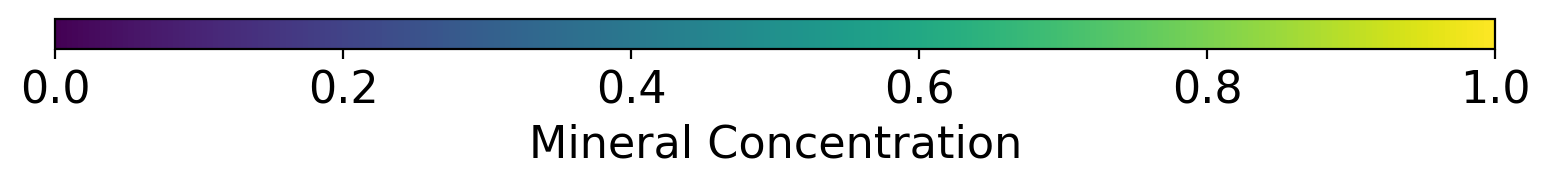

In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl

fig = plt.figure(figsize=(8, 1), dpi=200)
ax1 = fig.add_axes([0.05, 0.80, 0.9, 0.15])

cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=0, vmax=1)

cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap,
                                norm=norm,
                                orientation='horizontal',
                               )
cb1.ax.tick_params(labelsize=16)

cb1.set_label('Mineral Concentration', fontsize=16)
plt.savefig("../output/colorbar_mineral.pdf")

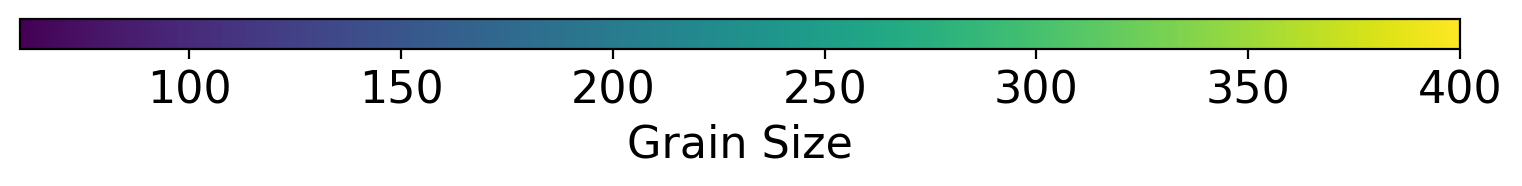

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl

from utils.constants import *

fig = plt.figure(figsize=(8, 1), dpi=200)
ax1 = fig.add_axes([0.05, 0.80, 0.9, 0.15])

cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=GRAIN_SIZE_MIN, vmax=GRAIN_SIZE_MAX)

cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap,
                                norm=norm,
                                orientation='horizontal',
                               )
cb1.ax.tick_params(labelsize=16)

cb1.set_label('Grain Size', fontsize=16)
plt.savefig("../output/colorbar_grainsize.pdf")

## Save section of image

In [ ]:
# Save section of image
with open(DATA_DIR + 'GALE_CRATER/' + IMG_DIR  + 'layered_img.pickle', 'rb') as handle:
    loaded_img = pickle.load(handle)
    
view = imshow(loaded_img[100:150,100:150,:], 
              bands= (120, 71, 18), 
              title="Section " + IMG_NAME)
with open(DATA_DIR + 'GALE_CRATER/' + IMG_DIR + 'layered_img_sec_100_150.pickle', 'wb') as f:
    pickle.dump(loaded_img[100:150,100:150,:], f)
    

    